In [29]:
import pandas as pd
import numpy as np
from os import getcwd, listdir, path
import matplotlib.pyplot as plt
import utils
from fitness.soga_fitness_trueskills import *
import itertools

In [66]:
fitness = []
#SKETCHES
#ex_names = ['mog1_sketch0_30', 'mog1_sketch1_30', 'mog1_sketch2_30', 'mog1_sketch3_30']
#programs = ['mog1', 'mog1', 'mog1', 'mog1']
#ex_names = ['if_sketch0_30', 'if_sketch1_30', 'if_sketch2_30', 'if_sketch3_30']
#programs = ['if', 'if', 'if', 'if']
#ex_names = ['biasedtugwar_nosketch_30', 'biasedtugwar_sketch1_30', 'biasedtugwar_sketch2_30', 'biasedtugwar_sketch3_30']
#programs = ['biasedtugwar', 'biasedtugwar', 'biasedtugwar', 'biasedtugwar']
ex_names = ['easytugwar_sketch0_30', 'easytugwar_sketch1_30', 'easytugwar_sketch2_30', 'easytugwar_sketch3_30']
programs = ['easytugwar', 'easytugwar', 'easytugwar', 'easytugwar']

labels = ['Nosketch', 'Sketch1', 'Sketch2', 'Sketch3']

#NOSKETCH
#ex_names = ['biasedtugwar_nosketch_30', 'csi_nosketch','easytugwar_sketch0_30', 'eyecolor_nosketch', 'hurricane_nosketch', 'if_sketch0_30', 'mixedcondition_sketch0_30', 'mog1_sketch0_30', 'multiplebranches_sketch0_30']
#ex_names = ['biasedtugwar_sketch1_30', 'burglary_sketch1', 'csi_sketch1','easytugwar_sketch1_30', 'if_sketch1_30', 'mixedcondition_sketch1_30', 'mog1_sketch1_30' ]
#programs = ['biasedtugwar', 'csi', 'easytugwar', 'eyecolor', 'hurricane', 'if', 'mixedcondition', 'mog1', 'multiplebranches']
#labels = programs


In [ ]:

i = 0
for name in ex_names:
    file_path = path.join(getcwd(), "..", "results", name, "best_fitness.csv")
    data_pd = pd.read_csv(file_path, header=None)
    #convert to numpy array
    data = data_pd.values
    #replace nan with -np.inf
    #compute median and interquartile range of each row
    data = np.nan_to_num(data, nan=-10000)
    median = np.median(data, axis=1)
    
    q1 = np.percentile(data, 25, axis=1)
    q3 = np.percentile(data, 75, axis=1)

    median = np.where(median == -10000, -np.inf, median)
    q1 = np.where(q1 == -10000, -np.inf, q1)
    q3 = np.where(q3 == -10000, -np.inf, q3)

    df = pd.DataFrame(list(map(list, itertools.zip_longest(*[median, q1, q3], fillvalue=None))), columns=['median', 'q1', 'q3'])
    df.to_csv('Figure6/mog1_'+labels[i]+'.tsv', sep="\t", index=False) 
    #wherere median, q1, q3 are -1000, replace with -np.inf
    
    #q1 = np.where(q1 == -1000, -np.inf, q1)
    #q3 = np.where(q3 == -1000, -np.inf, q3)
    fitness.append([median, q1, q3])
    i += 1

In [47]:
fitness[0][0]

array([         -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -inf,
                -inf,          -inf,          -inf,          -

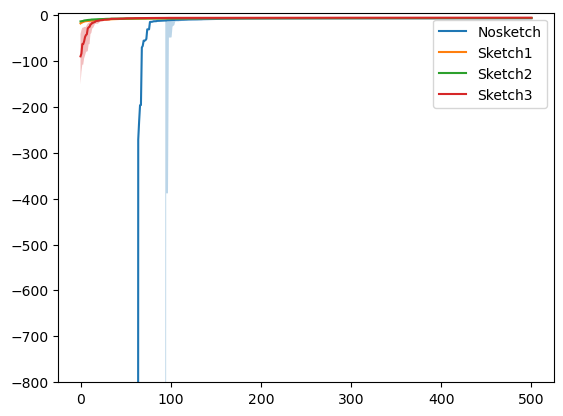

In [57]:
for i in range(len(ex_names)):
    plt.plot(range(len(fitness[i][0])), fitness[i][0], label=labels[i])
    plt.fill_between(range(len(fitness[i][0])), fitness[i][1], fitness[i][2], alpha=0.3)
plt.legend()
plt.ylim(-800, 5)
plt.show()

In [32]:
len(ex_names)

9

run  Rominas-Air.lan_25_1_21_211820_257045_27013_26  did not converge


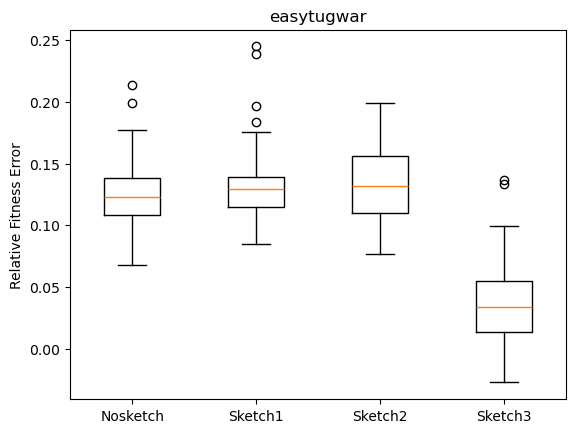

In [67]:
#create a boxplot with the median and the interquartile range
import pandas as pd
fitness_5000 = []
i = 0
for name in ex_names:
    fitness_5000_i, _ = utils.read_fitness_and_program(name)
    #remove nan values
    fitness_5000_i = np.array(fitness_5000_i)
    fitness_5000_i = fitness_5000_i[~np.isnan(fitness_5000_i)]
    #calculate the baseline
    path_baseline = path.join(getcwd(), "..", "baselines", programs[i] + ".soga")
    file = open(path_baseline)
    text_baseline = ''
    for line in file.readlines():
        text_baseline += line + ' '

    fitness_bl = likelihood_of_program_wrt_data(text_baseline, program=programs[i], data_size = 5000)
    fitness_5000_i = (np.abs(fitness_5000_i) - np.abs(fitness_bl)) / np.abs(fitness_bl)
    fitness_5000.append(fitness_5000_i)
    i += 1

plt.boxplot(fitness_5000, labels=labels)
plt.ylabel('Relative Fitness Error')
plt.title(programs[0])
plt.show()



In [68]:

df = pd.DataFrame(list(map(list, itertools.zip_longest(*fitness_5000, fillvalue=None))), columns=labels)
df.head(31)
df.to_csv('Figure5/'+programs[0]+'.tsv', sep="\t", index=False) 

In [35]:
fitness_5000

[array([0.32527696, 0.17195543, 0.35544384, 0.1865643 , 0.12862438,
        0.25314857, 0.14679112, 0.15407466, 0.2144436 , 0.17329247,
        0.35903701, 0.18166702, 0.07798625, 0.14141313, 0.27678556,
        0.16420189, 0.41407698, 0.03039293, 0.0792177 , 0.14498729,
        0.56349441, 0.16311049, 0.12945044, 0.21148589, 0.1337114 ,
        0.37190548, 0.64452533, 0.17729851, 0.1578707 , 0.05160226]),
 array([0.14602546, 0.26378472, 0.17974578, 0.12605127, 0.55002513,
        0.33389277, 0.12230486, 0.15745576, 0.20313343, 0.12980208,
        0.14701348]),
 array([0.12619649, 0.11169243, 0.13810517, 0.0694889 , 0.20100721,
        0.12814477, 0.11882885, 0.12838077, 0.11856073, 0.09892985,
        0.09611943, 0.13603217, 0.12624416, 0.12551512, 0.14681191,
        0.11668073, 0.10605638, 0.09383377, 0.12339216, 0.21551565,
        0.10963141, 0.1180033 , 0.10429193, 0.15181563, 0.16834562,
        0.17902361, 0.1097569 , 0.08703844, 0.14488019, 0.1398248 ]),
 array([0.78213421, 0.